# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다 (선택한 이유를 알 수 있기 때문에)
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [2]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 와인 데이터

In [6]:
wine = load_wine()

In [12]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 유방암 데이터

In [8]:
cancer = load_breast_cancer()

In [15]:
cancer_df = pd.DataFrame(data = cancer.data, columns= cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 회귀를 위한 데이터

### 보스턴 주택 가격 데이터

In [17]:
boston = load_boston()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [18]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 당뇨병 데이터

In [22]:
diabetes = load_diabetes()

In [23]:
diabates_df = pd.DataFrame(data = diabetes.data , columns=diabetes.feature_names)
diabates_df['target'] = diabetes.target
diabates_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [24]:
X = [[0,0], [1,1]] #질문
y = [ 0, 1 ] #답

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

In [27]:
model.predict([[2.,2.]])

array([1])

In [28]:
model.predict_proba([[2.,2.]]) #proba는 확률적으로 어디에 가까운지가 나옴

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [30]:
model = DecisionTreeClassifier()

In [32]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [33]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
) #전처리를 해도 별 효과 x

In [35]:
cross_val_score(
    estimator = model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

#### 학습된 결정 트리 시각화

In [36]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [37]:
r = tree.export_text(decision_tree=model,
                    feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

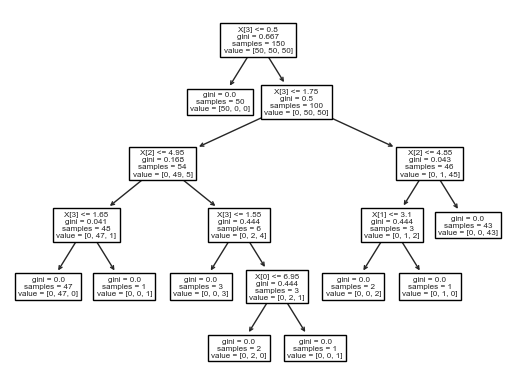

In [38]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

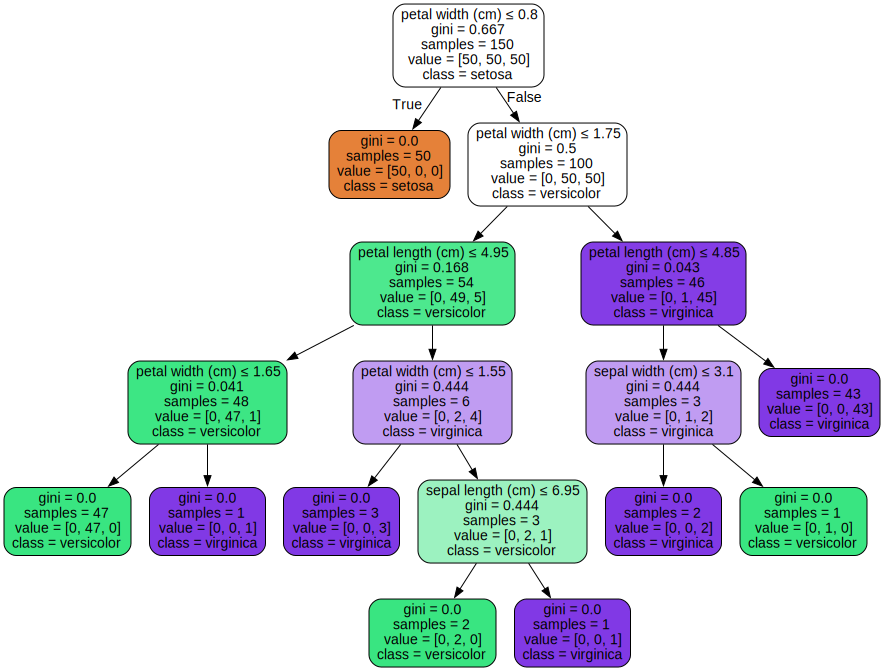

In [43]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                               )
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [44]:
n_classes = 3
plot_colors = 'ryb' #red yellow blue
plot_step = 0.02

##### 결정 경계 시각화

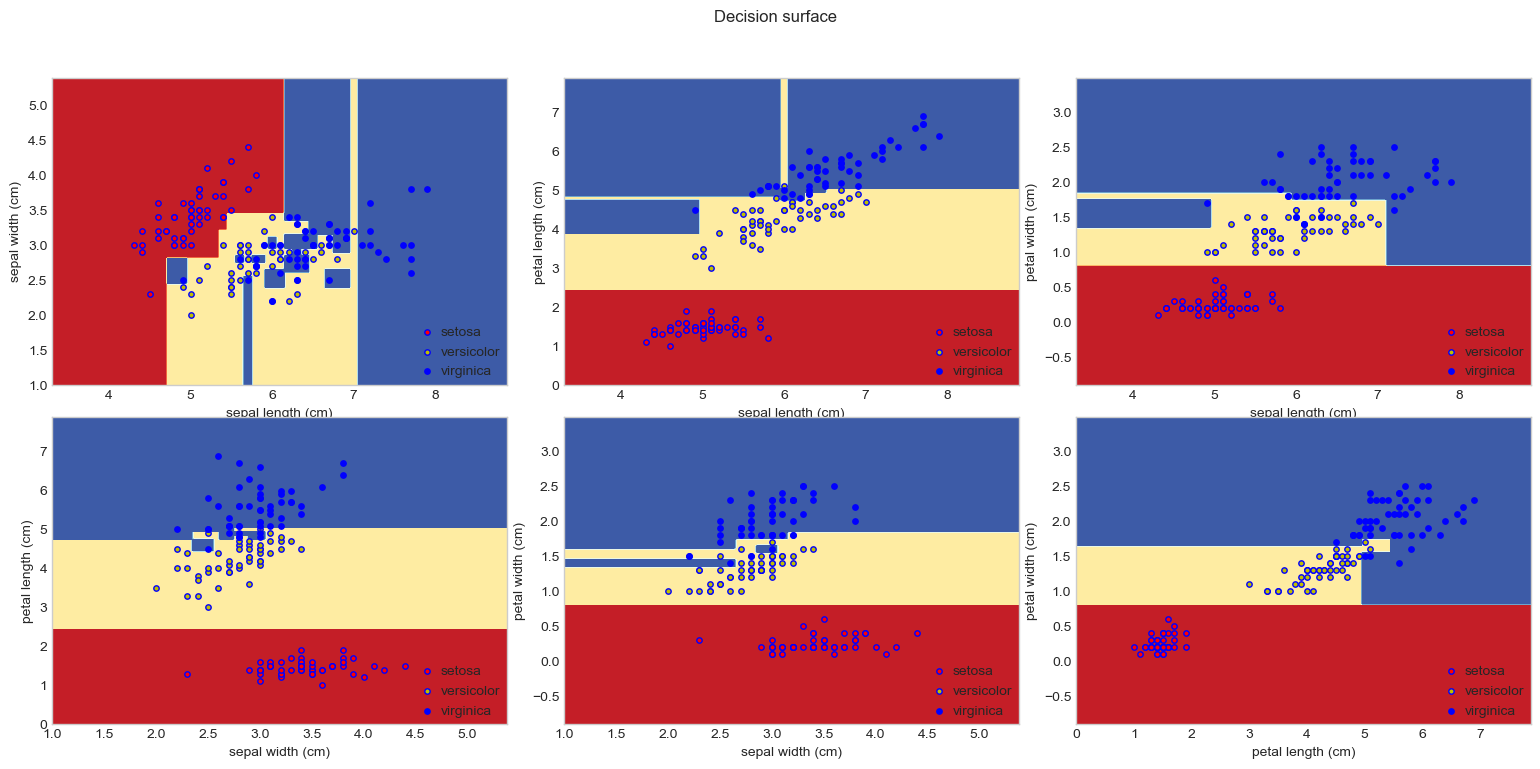

In [75]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                 [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=iris.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

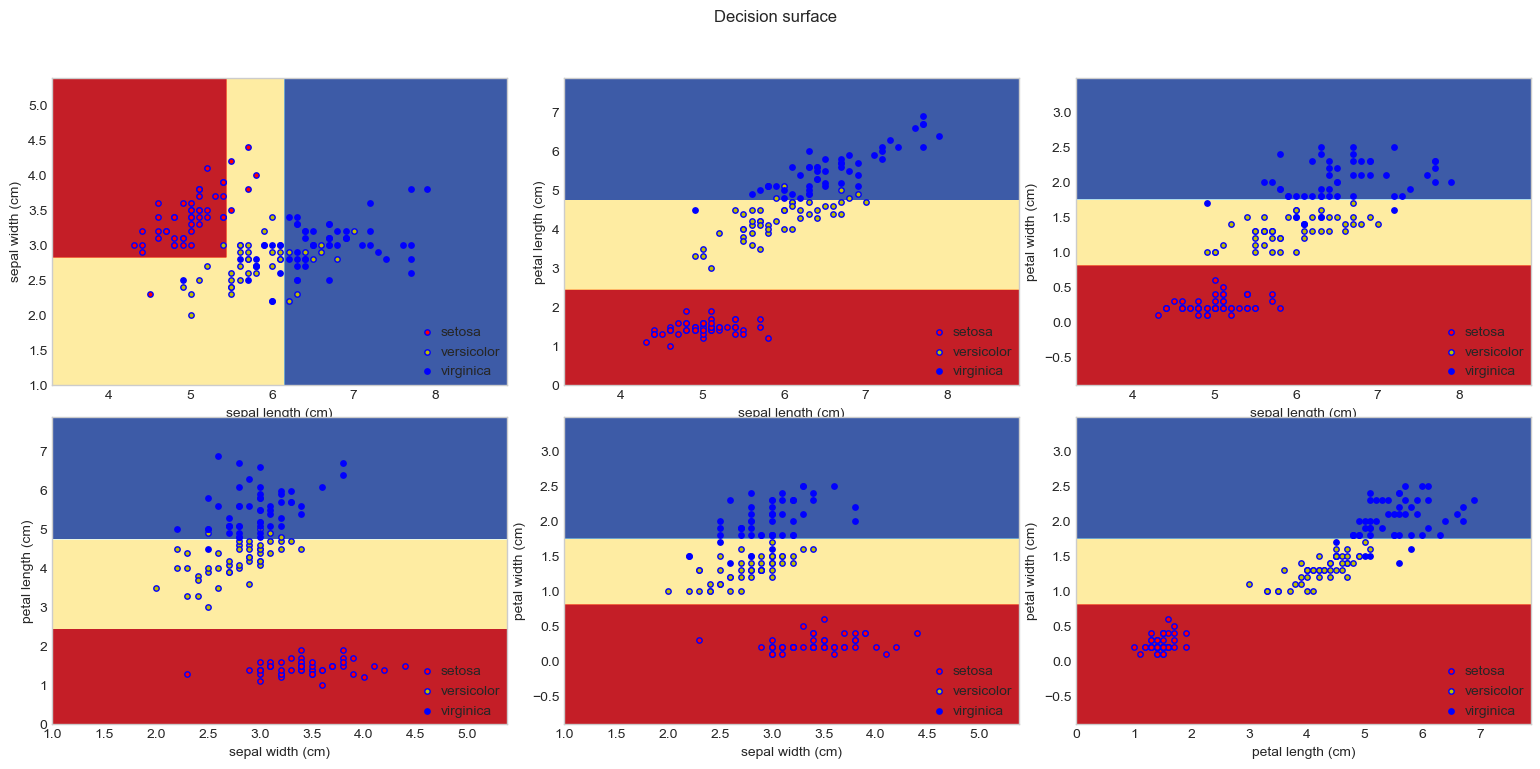

In [76]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                 [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=iris.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

### 와인 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [58]:
model = DecisionTreeClassifier()

In [59]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs= multiprocessing.cpu_count()
)

array([0.91666667, 0.86111111, 0.91666667, 0.91428571, 0.82857143])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [60]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [61]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs= multiprocessing.cpu_count()
)

array([0.94444444, 0.83333333, 0.83333333, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [62]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [64]:
r = tree.export_text(decision_tree=model,
                    feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- flavanoids <= 0.56
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  0.56
|   |   |   |   |--- class: 1
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- malic_acid <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  2.12
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- malic_acid <= 2.08
|   |   |   |--- class: 1
|   |   |--- malic_acid >  2.08
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |  

##### plot_tree를 사용한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[6] <= 0.565\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

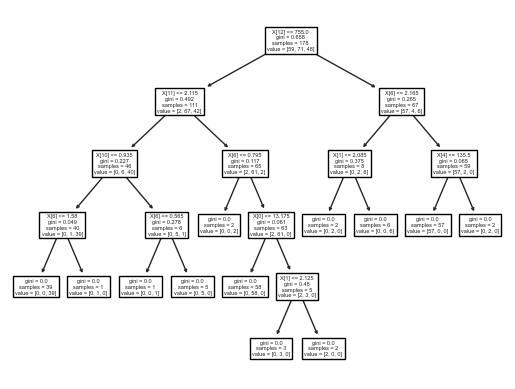

In [65]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

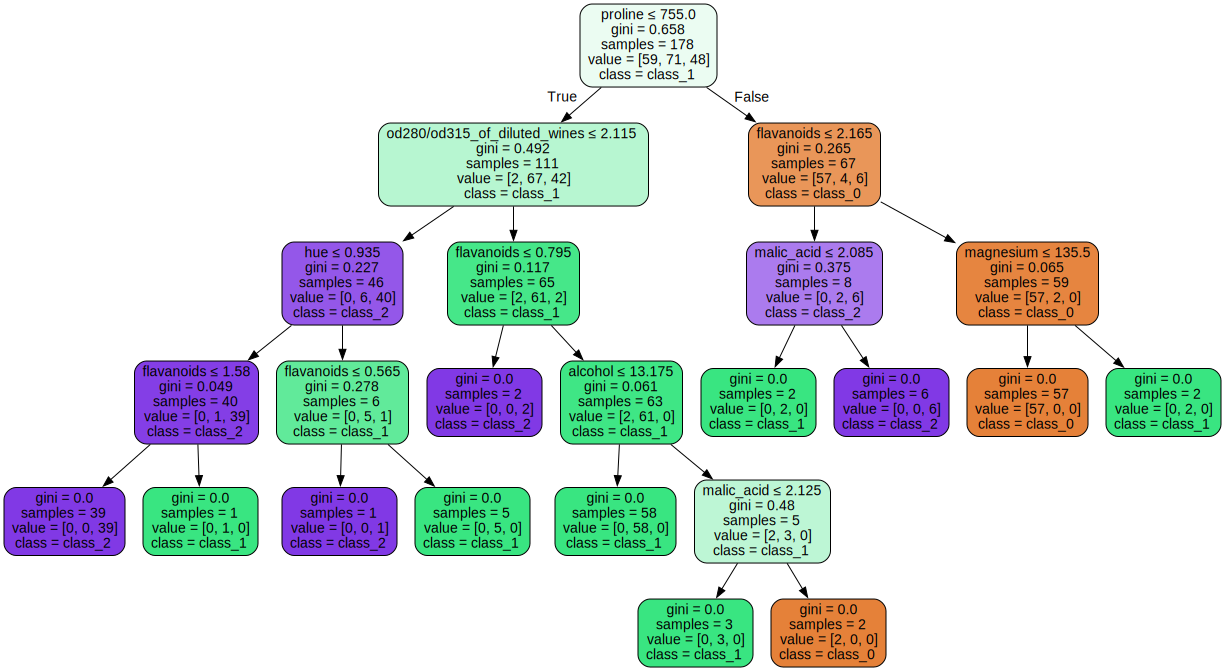

In [66]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True
                                )

graph = graphviz.Source(dot_data)
graph

#### 시각화

In [72]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

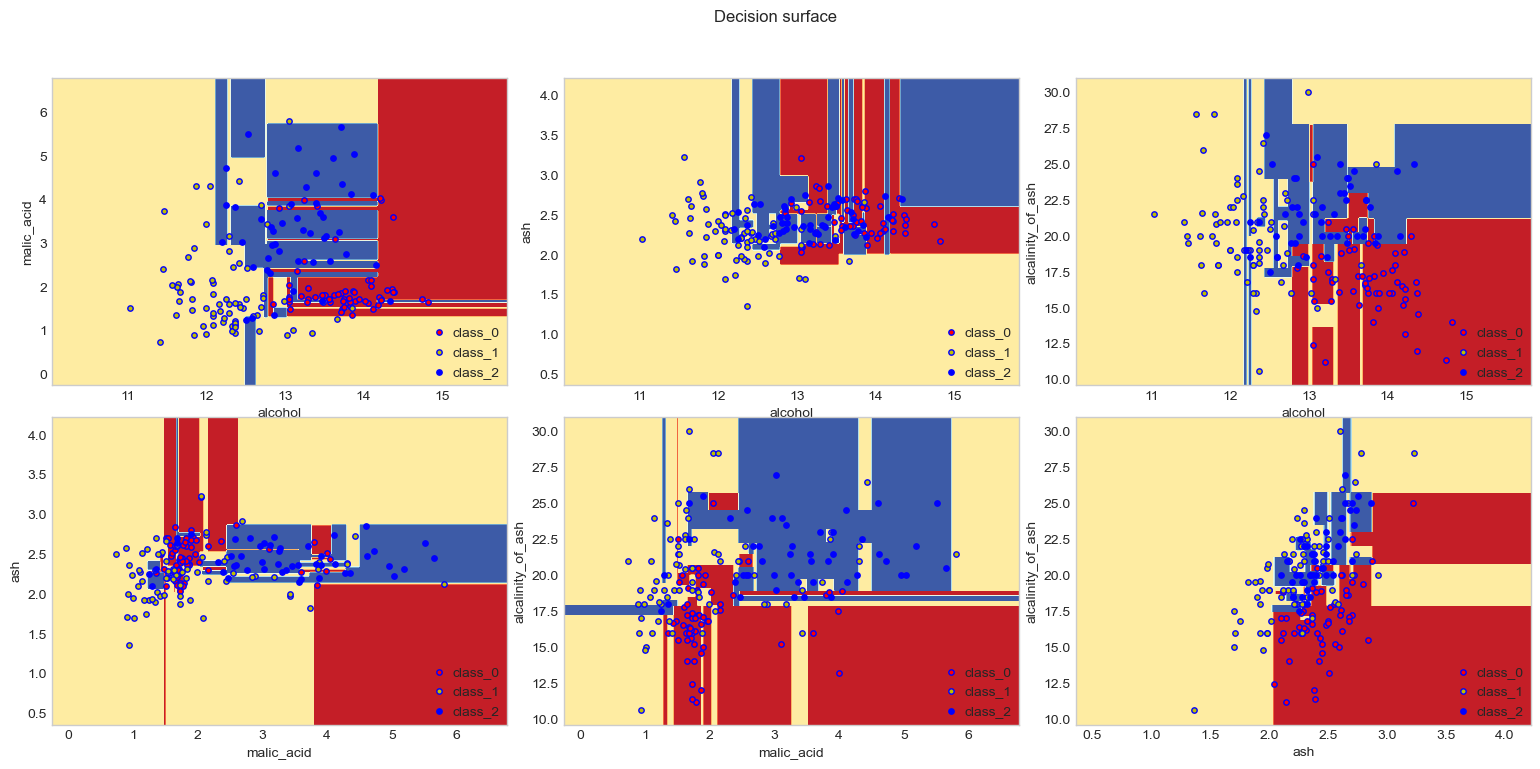

In [78]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                 [1,2],[1,3],[2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=wine.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

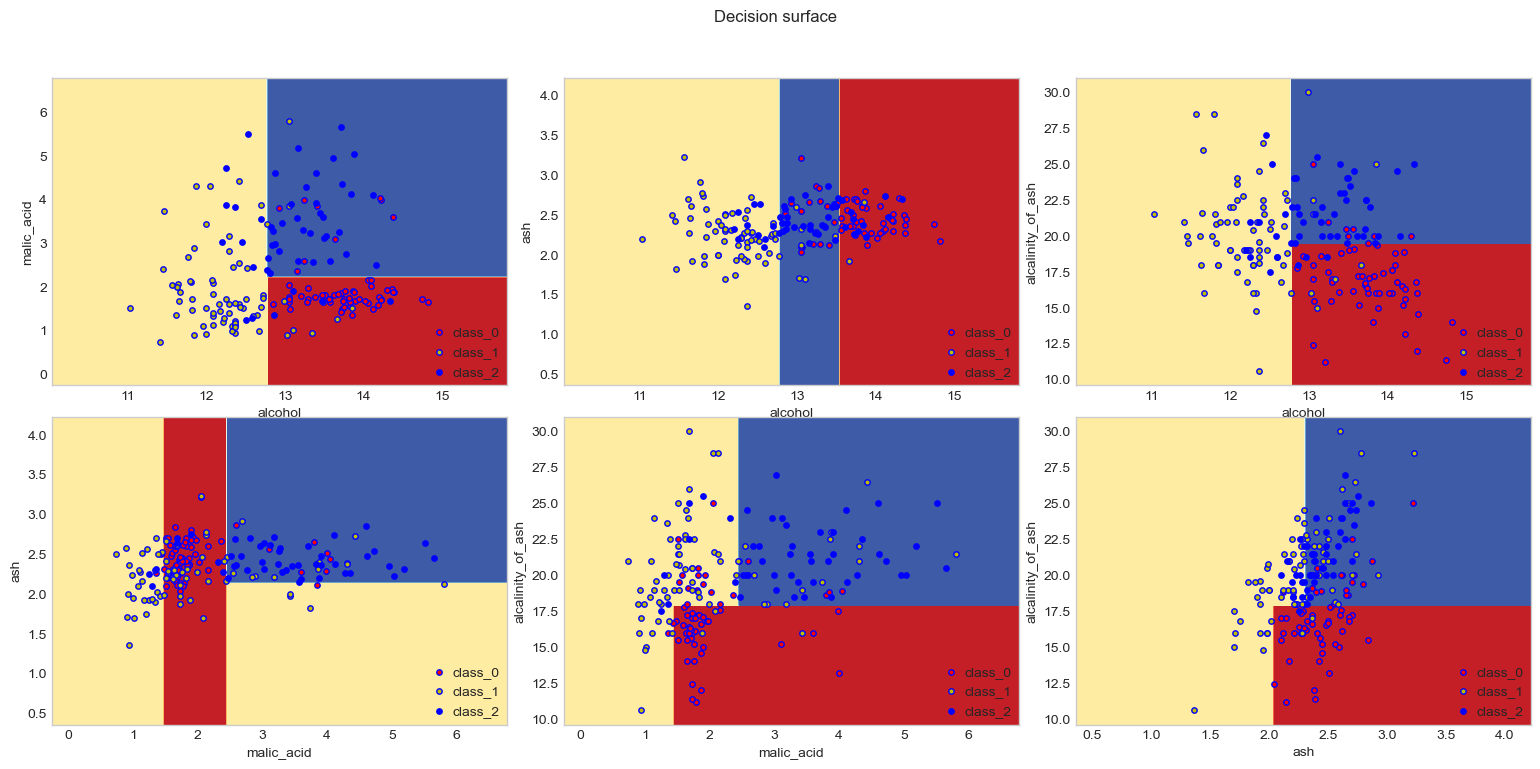

In [79]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                 [1,2],[1,3],[2,3]]):
    X = wine.data[:, pair]
    y = wine.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(wine.feature_names[pair[0]])
    plt.ylabel(wine.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=wine.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

### 유방암 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [80]:
model = DecisionTreeClassifier()

In [83]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.90350877, 0.9122807 , 0.9122807 , 0.92105263, 0.90265487])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [84]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [85]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.9122807 , 0.92105263, 0.92105263, 0.93859649, 0.89380531])

#### 학습된 결정 트리 시각화

In [86]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [87]:
r = tree.export_text(decision_tree=model)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.60
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_19 >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |   |--- class: 1
|   |   |

##### plot_tree를 사용한 시각화

[Text(0.625, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[19] <= 0.001\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'gi

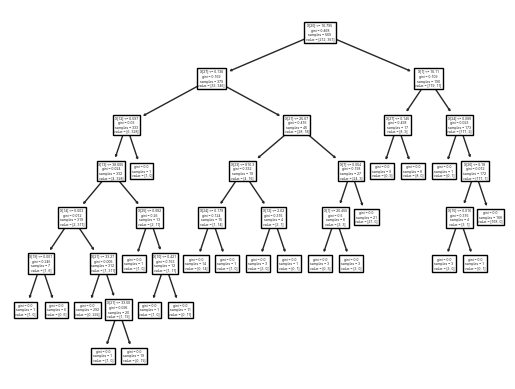

In [88]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

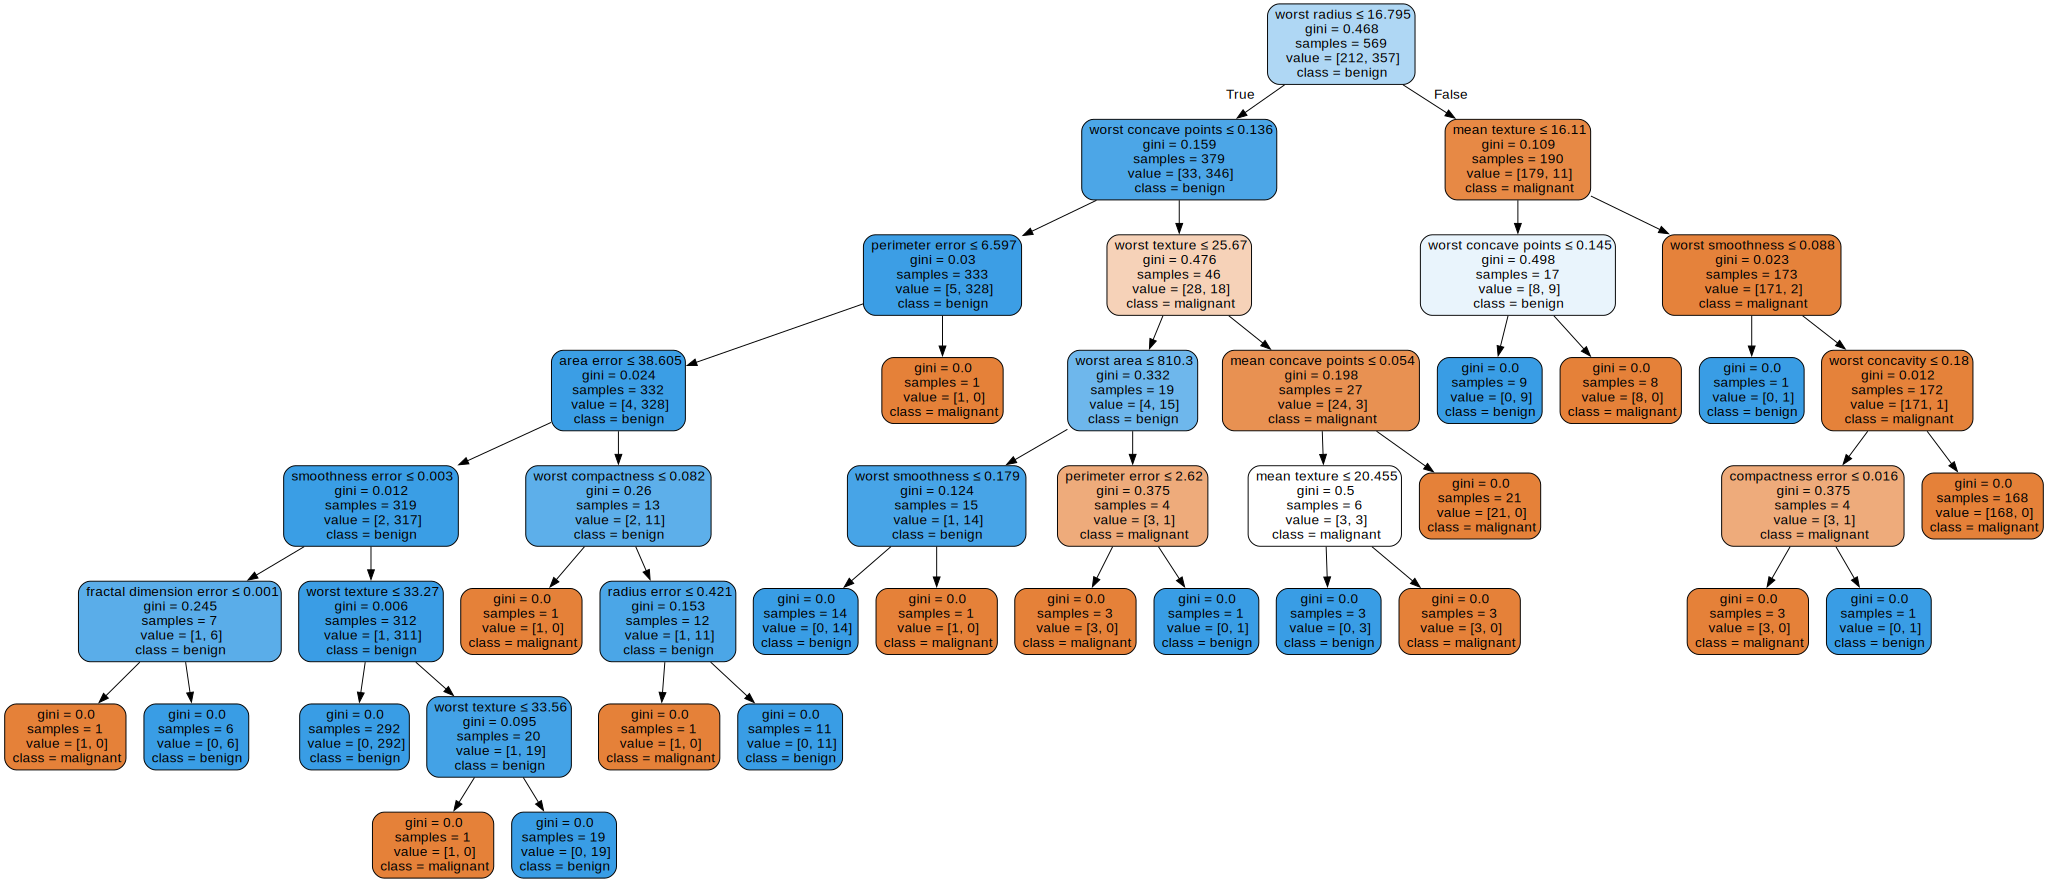

In [90]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                rounded=True, filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [93]:
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

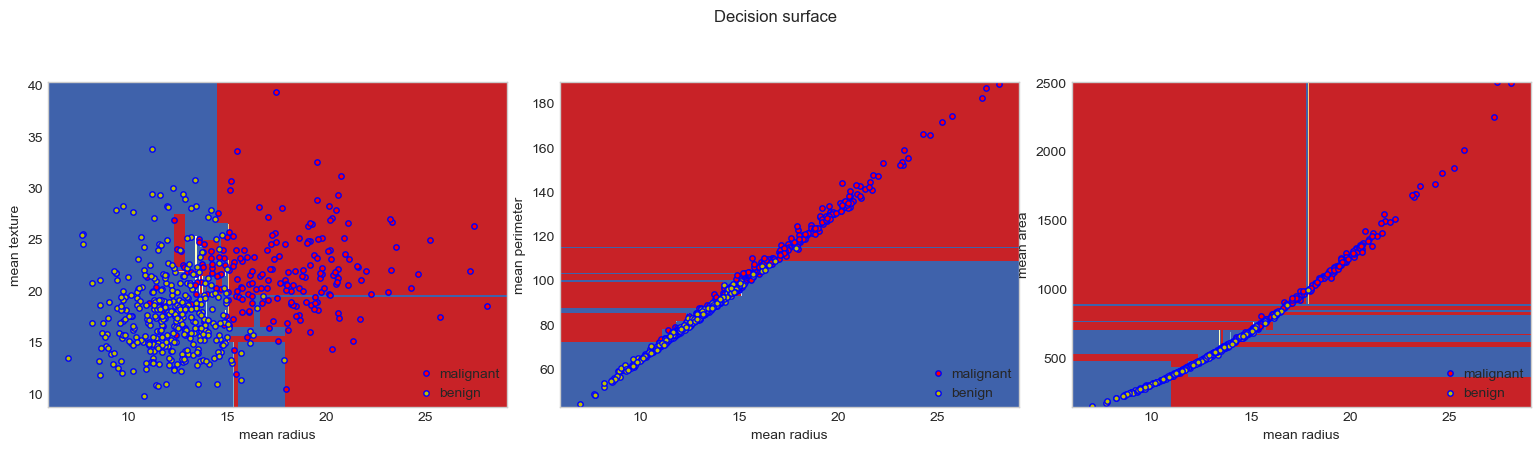

In [94]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier()
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=cancer.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

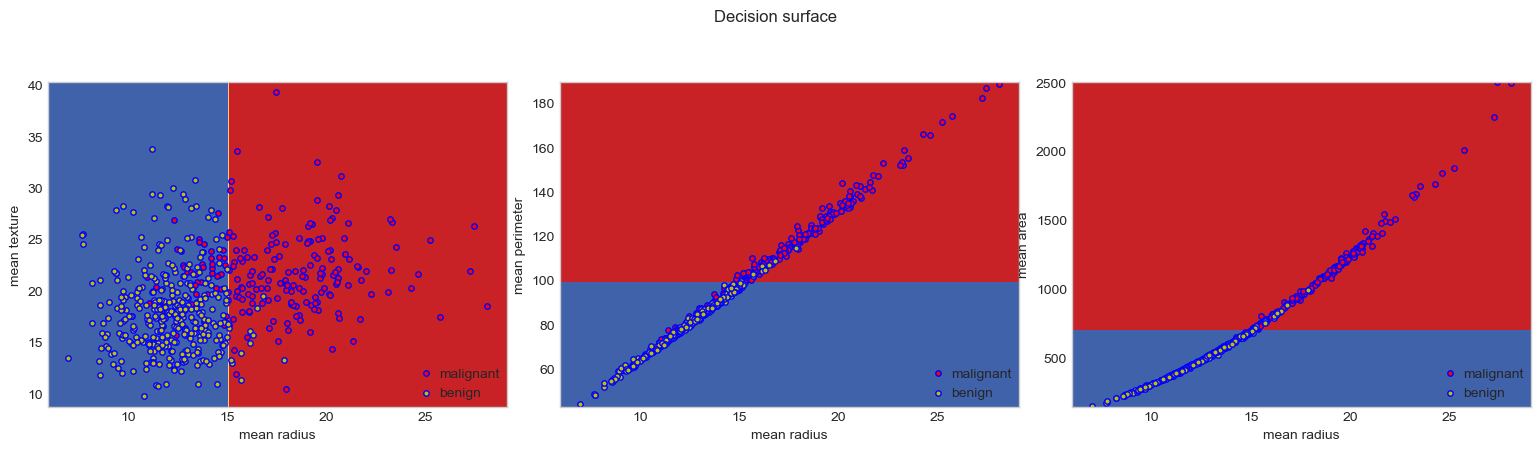

In [95]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3]]):
    X = cancer.data[:, pair]
    y = cancer.target
    
    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)
    
    plt.subplot(2,3 ,pairidx + 1)
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(cancer.feature_names[pair[0]])
    plt.ylabel(cancer.feature_names[pair[1]])
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label=cancer.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolors='b', s=15)
    
    plt.suptitle("Decision surface")
    plt.legend(loc = 'lower right', borderpad=0, handletextpad=0)
    plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [97]:
model =DecisionTreeRegressor()

In [98]:
cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.61597006,  0.41089727,  0.65138372,  0.41252393, -1.78496846])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [99]:
model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [100]:
cross_val_score(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.59481517,  0.41059492,  0.66376379,  0.38922984, -1.4678002 ])

#### 학습된 결정 트리 시각화

In [101]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [102]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- featur

##### plot_tree를 사용한 시각화

[Text(0.6833210281732908, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.43066394817519316, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.19563192351030204, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.11327759160618123, 0.825, 'X[12] <= 10.83\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.11140449397096698, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.11515068924139546, 0.775, 'squared_error = -0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.27798625541442284, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11889688451182392, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.04141301802856474, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.039539920393350504, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text

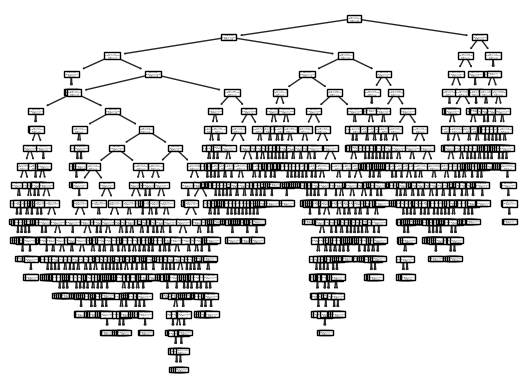

In [103]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

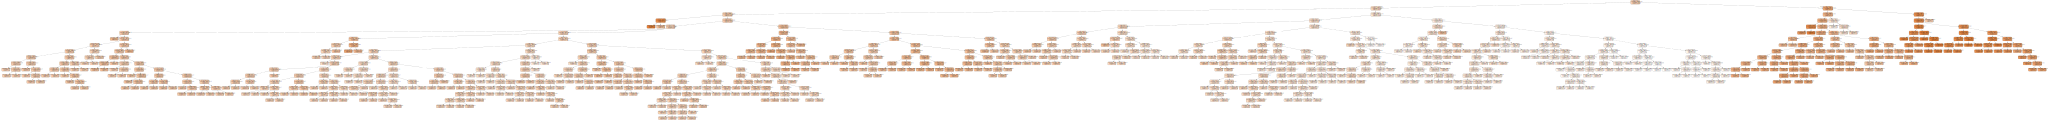

In [105]:
dot_data = tree.export_graphviz(decision_tree=model,
                               feature_names=boston.feature_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

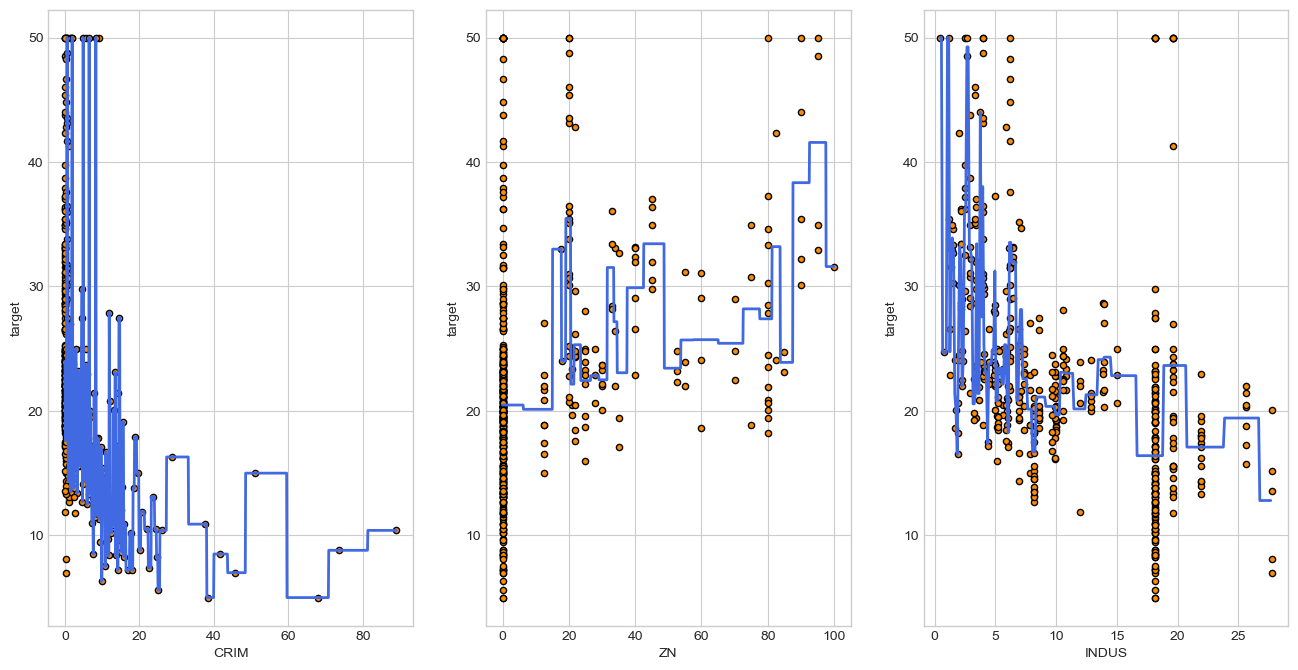

In [109]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
    X = boston.data[:,pair].reshape(-1,1)
    y = boston.target
    
    model = DecisionTreeRegressor()
    model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1,3, pairidx + 1)
    plt.scatter(X,y, s=20, edgecolors='k',
               c='darkorange', label='data')
    plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

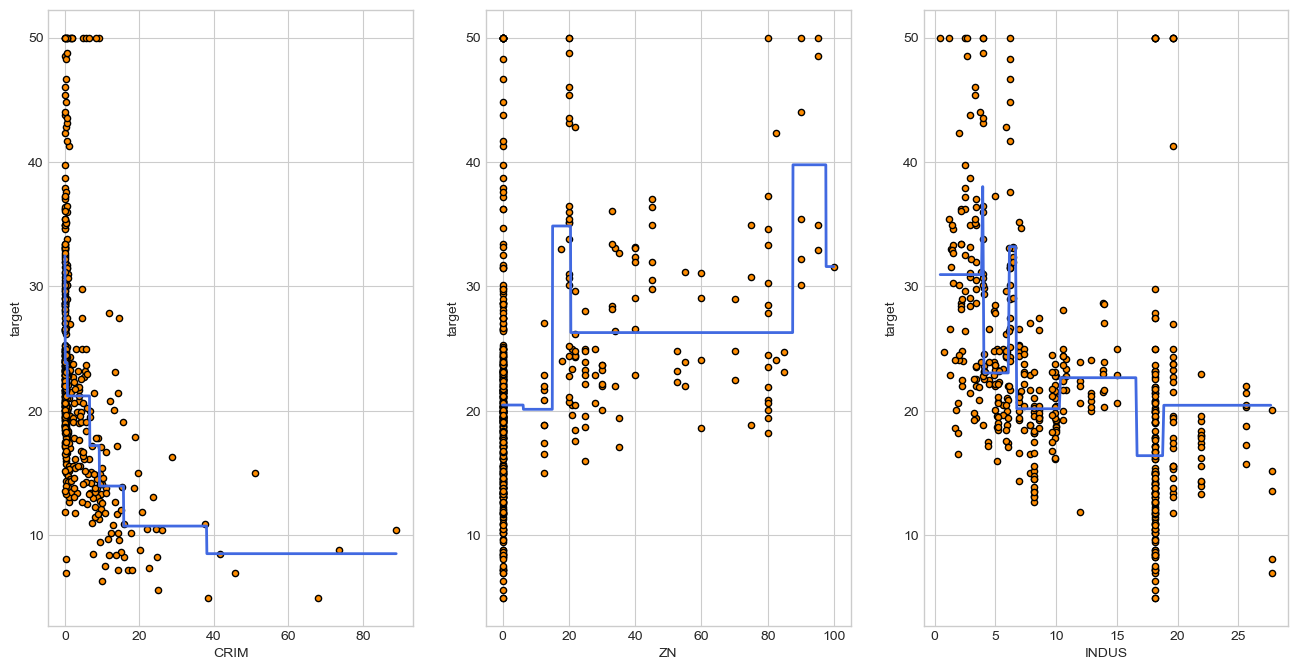

In [110]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
    X = boston.data[:,pair].reshape(-1,1)
    y = boston.target
    
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X,y)
    
    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)
    
    plt.subplot(1,3, pairidx + 1)
    plt.scatter(X,y, s=20, edgecolors='k',
               c='darkorange', label='data')
    plt.plot(X_test, predict, color = 'royalblue', linewidth=2)
    plt.xlabel(boston.feature_names[pair])
    plt.ylabel('target')

### 당뇨병 데이터 학습

#### 교차검증

##### 전처리 없이 학습

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### plot_tree를 사용한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화